# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities.count()

['rikitea',
 'ovre ardal',
 'irtyshskiy',
 'new norfolk',
 'ushuaia',
 'bredasdorp',
 'dikson',
 'atuona',
 'busselton',
 'cape town',
 'san juan',
 'norsup',
 'jamestown',
 'la ronge',
 'nanortalik',
 'foxton',
 'cherskiy',
 'port alfred',
 'bengkulu',
 'hilo',
 'hermanus',
 'taolanaro',
 'vaini',
 'benguela',
 'akyab',
 'mataura',
 'mayo',
 'sioux lookout',
 'torbay',
 'punta arenas',
 'kapaa',
 'greenwood',
 'namibe',
 'nizhneyansk',
 'mokhsogollokh',
 'kodiak',
 'bluff',
 'bastrop',
 'alamos',
 'poronaysk',
 'guerrero negro',
 'raudeberg',
 'chokurdakh',
 'cockburn town',
 'taman',
 'umm lajj',
 'grindavik',
 'sinkat',
 'kavieng',
 'kaitangata',
 'santa vitoria do palmar',
 'thompson',
 'sistranda',
 'hambantota',
 'pevek',
 'ushtobe',
 'lebu',
 'prince albert',
 'olavarria',
 'borovoy',
 'puerto ayora',
 'arraial do cabo',
 'luanda',
 'muzhi',
 'hailar',
 'illoqqortoormiut',
 'hasaki',
 'livani',
 'amderma',
 'vila franca do campo',
 'tuktoyaktuk',
 'makaryev',
 'sao joao da barra

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
url= 'http://api.openweathermap.org/data/2.5/weather?'
query_url=url+"appid="+api_key+"&q="
new_cities=[]
temp_data=[]
lat_data=[]
humid_data=[]
wind_speed_data=[]
cloud_data=[]

print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    try:
        print('Processing Record for '+city),
        response = requests.get(query_url + city).json()
        temp_data.append(response['main']['temp']),
        lat_data.append(response['coord']['lat']),
        humid_data.append(response['main']['humidity']),
        wind_speed_data.append(response['wind']['speed']),
        cloud_data.append(response['clouds']['all'])
        new_cities.append(response['name'])
    
    except KeyError:
        print(city +' Not Found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record for rikitea
Processing Record for ovre ardal
Processing Record for irtyshskiy
Processing Record for new norfolk
Processing Record for ushuaia
Processing Record for bredasdorp
Processing Record for dikson
Processing Record for atuona
Processing Record for busselton
Processing Record for cape town
Processing Record for san juan
Processing Record for norsup
Processing Record for jamestown
Processing Record for la ronge
Processing Record for nanortalik
Processing Record for foxton
Processing Record for cherskiy
Processing Record for port alfred
Processing Record for bengkulu
bengkulu Not Found. Skipping...
Processing Record for hilo
Processing Record for hermanus
Processing Record for taolanaro
taolanaro Not Found. Skipping...
Processing Record for vaini
Processing Record for benguela
Processing Record for akyab
akyab Not Found. Skipping...
Processing Record for mataura
Processing Record for mayo
Processing Record for

Processing Record for tessalit
Processing Record for barentsburg
barentsburg Not Found. Skipping...
Processing Record for valdivia
Processing Record for koutsouras
Processing Record for san andres
Processing Record for carutapera
Processing Record for marquette
Processing Record for grants pass
Processing Record for necochea
Processing Record for porto novo
Processing Record for palabuhanratu
palabuhanratu Not Found. Skipping...
Processing Record for izumo
Processing Record for antalaha
Processing Record for saint-francois
Processing Record for lhokseumawe
Processing Record for lovozero
Processing Record for ilulissat
Processing Record for zabrze
Processing Record for tra vinh
Processing Record for san policarpo
Processing Record for dien bien
dien bien Not Found. Skipping...
Processing Record for margate
Processing Record for saint pete beach
Processing Record for bambanglipuro
Processing Record for victoria
Processing Record for geraldton
Processing Record for rawson
Processing Recor

Processing Record for datong
Processing Record for nikolskoye
Processing Record for curvelo
Processing Record for canatlan
Processing Record for birao
Processing Record for spring valley
Processing Record for lasa
Processing Record for ask
Processing Record for maarianhamina
maarianhamina Not Found. Skipping...
Processing Record for makakilo city
Processing Record for baraki barak
Processing Record for trzebiatow
Processing Record for sao felix do xingu
Processing Record for potsdam
Processing Record for boras
Processing Record for lookan
Processing Record for okitipupa
Processing Record for yulara
Processing Record for podor
Processing Record for fort saint john
fort saint john Not Found. Skipping...
Processing Record for kanniyakumari
Processing Record for cockburn harbour
cockburn harbour Not Found. Skipping...
Processing Record for teluk nibung
teluk nibung Not Found. Skipping...
Processing Record for najran
Processing Record for skegness
Processing Record for huancabamba
Processin

{'coord': {'lon': 17.48, 'lat': -12.02},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 282.153,
  'pressure': 1020.37,
  'humidity': 56,
  'temp_min': 282.153,
  'temp_max': 282.153,
  'sea_level': 1020.37,
  'grnd_level': 838.62},
 'wind': {'speed': 1.88, 'deg': 144.572},
 'clouds': {'all': 15},
 'dt': 1559698527,
 'sys': {'message': 0.0043,
  'country': 'AO',
  'sunrise': 1559711113,
  'sunset': 1559752326},
 'timezone': 3600,
 'id': 3351014,
 'name': 'Camacupa',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [129]:
city_pd=pd.DataFrame({
    "City":new_cities,
    "Temperature (k)": temp_data,
    "Latitude": lat_data,
    "Humidity (%)":humid_data,
    "Cloudiness (%)": cloud_data,
    "Wind Speed (mph)":wind_speed_data
})
city_pd.to_csv(output_data_file)
city_pd.head()

,City,Temperature (k),Latitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,297.553,-23.12,79,19,1.06
1,Ovre Ardal,276.453,61.32,72,33,1.81
2,Irtyshskiy,286.353,58.33,90,100,5.90
3,New Norfolk,284.880,-42.78,58,75,7.70
4,Ushuaia,278.150,-54.81,86,75,1.50


In [70]:

city_with_temp_in_f=pd.DataFrame({
    "City":new_cities,
    "Temperature (F)":((city_pd["Temperature (F)"]-273.15)*1.8)+32,
    "Latitude": lat_data,
    "Humidity (%)":humid_data,
    "Cloudiness (%)": cloud_data,
    "Wind Speed (mph)":wind_speed_data
})
city_with_temp_in_f.head()

,City,Temperature (F),Latitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,75.9254,-23.12,79,19,1.06
1,Ovre Ardal,37.9454,61.32,72,33,1.81
2,Irtyshskiy,55.7654,58.33,90,100,5.90
3,New Norfolk,53.1140,-42.78,58,75,7.70
4,Ushuaia,41.0000,-54.81,86,75,1.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

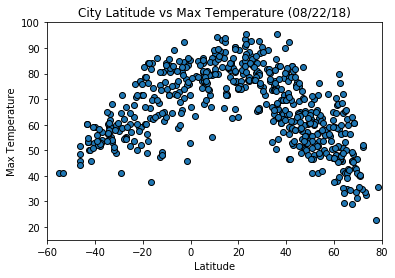

<Figure size 432x288 with 0 Axes>

In [130]:
x_lat=city_with_temp_in_f["Latitude"]
y_temp=city_with_temp_in_f["Temperature (F)"]
plt.scatter(x_lat,y_temp,marker='o', edgecolors='black')
plt.xlim(-60,80)
plt.ylim(15,100)
plt.title('City Latitude vs Max Temperature (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()
plt.savefig("./output_data/Lat_Temp.png")

#### Latitude vs. Humidity Plot

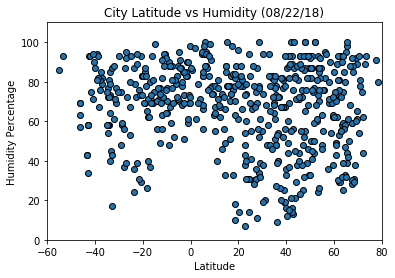

<Figure size 432x288 with 0 Axes>

In [131]:
x_lat=city_with_temp_in_f["Latitude"]
y_humid=city_with_temp_in_f["Humidity (%)"]
plt.scatter(x_lat,y_humid,marker='o', edgecolors='black')
plt.xlim(-60,80)
plt.ylim(0,110)
plt.title('City Latitude vs Humidity (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity Percentage')
plt.show()
plt.savefig("./output_data/Lat_Humid.png")

#### Latitude vs. Cloudiness Plot

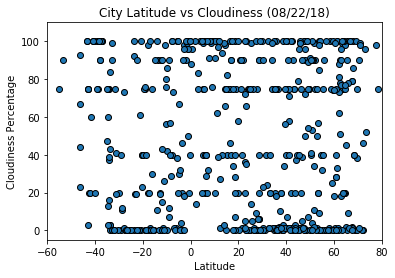

<Figure size 432x288 with 0 Axes>

In [132]:
x_lat=city_with_temp_in_f["Latitude"]
y_cloud=city_with_temp_in_f["Cloudiness (%)"]
plt.scatter(x_lat,y_cloud,marker='o', edgecolors='black')
plt.xlim(-60,80)
plt.ylim(-5,110)
plt.title('City Latitude vs Cloudiness (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness Percentage')
plt.show()
plt.savefig("./output_data/Lat_Cloud.png")

#### Latitude vs. Wind Speed Plot

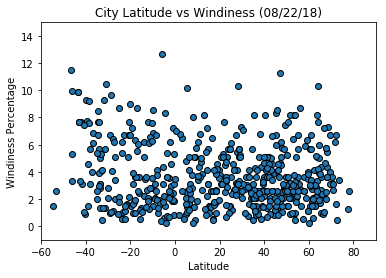

<Figure size 432x288 with 0 Axes>

In [133]:
x_lat=city_with_temp_in_f["Latitude"]
y_wind=city_with_temp_in_f["Wind Speed (mph)"]
plt.scatter(x_lat,y_wind,marker='o', edgecolors='black')
plt.xlim(-60,90)
plt.ylim(-1,15)
plt.title('City Latitude vs Windiness (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Windiness Percentage')
plt.show()
plt.savefig("./output_data/Lat_Wind.png")